In [183]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

True

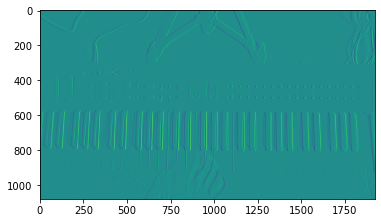

In [184]:
img_path = "./imagefile/tryout/img_000.jpg"
img=cv2.imread(img_path)

img_resize = cv2.resize(img, dsize=[1920,1080], fx=None, fy=None)

cv2.imwrite(img_path,img_resize)

# HSVに変換
RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(RGB, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(hsv,cv2.CV_64F,1,0,ksize=5)

plt.imshow(sobelx)
cv2.imwrite("./after/test.jpg",sobelx)

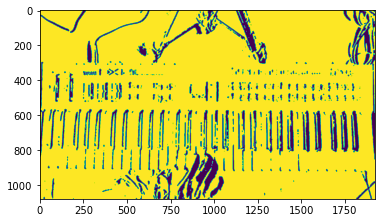

In [185]:
im_out = cv2.imread("./after/test.jpg")

# 画像をグレースケールで読み出しオブジェクトimg_grayに代入
img_gray = cv2.cvtColor(im_out,cv2.COLOR_BGR2GRAY)
# img_grayを平均化領域9x9で平均化処理しimg_blurに代入
img_blur = cv2.blur(img_gray,(9,9)) 

#閾値
threshold=120

# オブジェクトimg_blurを閾値thresholdで反転二値化しimg_binaryに代入
ret, img_binary= cv2.threshold(img_blur, threshold, 255, cv2.THRESH_BINARY_INV)
cv2.imwrite("./after/image0.jpg",img_binary) 
# img_binaryを輪郭抽出
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
plt.imshow(img_binary)

0 外接矩形の座標
[[ 715 1078]
 [ 731 1051]
 [ 739 1056]
 [ 723 1083]] 

1 外接矩形の座標
[[1827 1026]
 [1895 1026]
 [1895 1079]
 [1827 1079]] 

2 外接矩形の座標
[[1886  989]
 [1919  989]
 [1919 1079]
 [1886 1079]] 

3 外接矩形の座標
[[ 814  965]
 [ 851  963]
 [ 856 1078]
 [ 818 1080]] 

4 外接矩形の座標
[[  0 579]
 [ 12 579]
 [ 12 721]
 [  0 721]] 

5 外接矩形の座標
[[1131    0]
 [1137   -1]
 [1165   73]
 [1160   75]] 

6 外接矩形の座標
[[   0 1078]
 [   0    0]
 [1918    0]
 [1918 1078]] 

7 外接矩形の座標
[[1284 1059]
 [1284 1044]
 [1290 1044]
 [1290 1059]] 

8 外接矩形の座標
[[ 587 1038]
 [ 594 1035]
 [ 602 1052]
 [ 596 1055]] 

9 外接矩形の座標
[[ 355 1034]
 [ 381 1024]
 [ 384 1031]
 [ 357 1042]] 

10 外接矩形の座標
[[ 705 1025]
 [ 724 1022]
 [ 729 1052]
 [ 710 1055]] 

11 外接矩形の座標
[[ 384 1031]
 [ 384 1023]
 [ 398 1023]
 [ 398 1031]] 

12 外接矩形の座標
[[ 562  988]
 [ 577  984]
 [ 593 1050]
 [ 578 1054]] 

13 外接矩形の座標
[[ 486  991]
 [ 493  984]
 [ 514 1005]
 [ 507 1012]] 

14 外接矩形の座標
[[616 975]
 [626 973]
 [630 995]
 [619 997]] 

15 外接矩形の座標
[[497 978]
 [501 974]
 [5

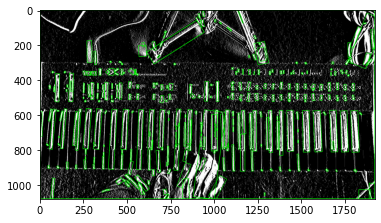

In [186]:
# 小さい輪郭は誤検出として削除する
contours = list(filter(lambda y: cv2.contourArea(y) > 50, contours))

ylen=[]

ID=0
for i in contours:
    y=[]
    rect = cv2.minAreaRect(i)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img = cv2.drawContours(im_out,[box],0,(0,255,0),2)
    #cv2.imwrite("./after/gaisetu"+str(ID)+".jpg",img)  
    plt.imshow(img)

    # 外接矩形の座標、回転角の表示
    print(str(ID),'外接矩形の座標')
    print(box,"\n")
    #print('回転角:')
    #print(rect[2])
   

    #各輪郭の左端、右端を取得
    for  r in box:
        y+=[r[1]]
        
    ylen+=[[max(min(y),0),min(max(y),1080)]]
    ID+=1

In [187]:
#検出した輪郭の上端と下端
print(ylen)

[[1051, 1080], [1026, 1079], [989, 1079], [963, 1080], [579, 721], [0, 75], [0, 1078], [1044, 1059], [1035, 1055], [1024, 1042], [1022, 1055], [1023, 1031], [984, 1054], [984, 1012], [973, 997], [974, 990], [967, 981], [960, 1078], [957, 998], [944, 1080], [941, 1036], [937, 1023], [911, 924], [911, 947], [909, 922], [908, 922], [908, 927], [908, 921], [906, 936], [907, 923], [905, 921], [895, 922], [889, 907], [889, 904], [885, 907], [880, 908], [871, 1017], [871, 890], [868, 908], [863, 941], [854, 909], [843, 921], [843, 920], [840, 876], [837, 856], [836, 909], [823, 911], [822, 921], [813, 833], [803, 921], [798, 867], [800, 927], [798, 819], [797, 915], [798, 820], [794, 860], [794, 824], [789, 800], [777, 885], [775, 805], [773, 803], [771, 784], [770, 795], [768, 916], [770, 781], [768, 921], [766, 779], [763, 776], [761, 775], [761, 776], [755, 779], [749, 780], [743, 799], [742, 759], [740, 766], [730, 739], [724, 796], [721, 730], [709, 921], [706, 719], [697, 732], [694, 72

In [188]:
#各横列に含まれる輪郭の数をカウント
hst=[0]*1080
i=0
while i<len(ylen):
    j=ylen[i][0]
    while j<ylen[i][1]:
        hst[j]+=1
        j+=1
    i+=1
print(hst)

[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 9, 9, 9, 9, 9, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 10, 10, 11, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 12, 13, 13, 12, 12, 13, 14, 15, 15, 15, 15, 

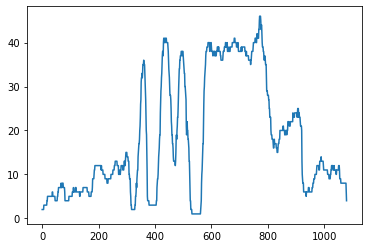

In [189]:
#グラフ化
plt.plot(hst) 
plt.show()

In [190]:
#疑似的に積分し、最も輪郭が多い範囲を取得
i=0
hst+=[-1]
menseki=[]
ykenban=[]
while i<1080:
    sekibun=0
    while hst[i]<20 and hst[i]!=-1:
        i+=1
    ystart=i
    while hst[i]>=20 and hst[i]!=-1:
        sekibun+=hst[i]
        i+=1
    yend=i
    ykenban+=[[ystart,yend]]
    menseki+=[sekibun]
print(ykenban)
print(menseki)
ind=menseki.index(max(menseki))
print(ykenban[ind])

[[346, 370], [419, 460], [478, 512], [513, 517], [572, 812], [843, 860], [863, 867], [868, 921], [1080, 1080]]
[719, 1428, 1091, 82, 9019, 342, 80, 1194, 0]
[572, 812]


(1080, 1920)


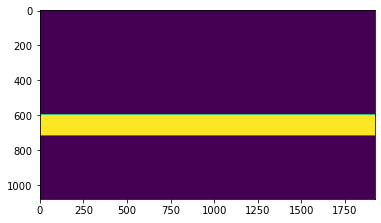

In [191]:
# マスク用単一色画像を作成

#若干の調整
yy = math.floor(0.1*(ykenban[ind][1]-ykenban[ind][0])) 
height = yy*5


imgMask = np.full((1, 1, 1), 1, dtype=np.uint8)
imgMask_resize = cv2.resize(imgMask, dsize=[1920,1080], fx=None, fy=None)

print(imgMask_resize.shape)

# マスク範囲を四角形で描画
boxFromX = 0 #マスク範囲開始位置 X座標
boxFromY = ykenban[ind][0] + yy #マスク範囲開始位置 Y座標
boxToX = 1980 #マスク範囲終了位置 X座標
boxToY = boxFromY + height #マスク範囲終了位置 Y座標

cv2.rectangle(imgMask_resize, (boxFromX, boxFromY), (boxToX, boxToY),(255), cv2.FILLED)

# マスク結果画像を保存
cv2.imwrite("./mask/testMaskImg.jpg", imgMask_resize)
plt.imshow(imgMask_resize)

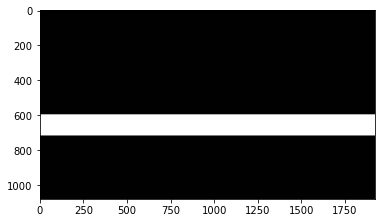

In [192]:
white=cv2.imread("./mask/white.jpg",cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/testMaskImg.jpg')
white_resize = cv2.resize(white, dsize=[1920,1080], fx=None, fy=None)
cv2.imwrite("./after/white_resize.jpg",white_resize)
im_out = cv2.bitwise_and(white_resize, im_mask)
cv2.imwrite('./mask/whitemask.jpg', im_out)
plt.imshow(im_out)

True

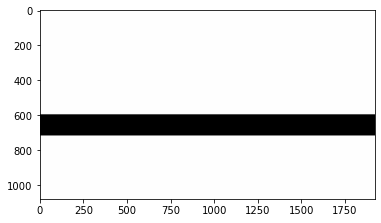

In [193]:
black=cv2.bitwise_not(im_out)
plt.imshow(black)
cv2.imwrite("./mask/blackmask.jpg",black)

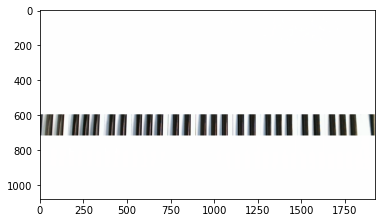

In [194]:
im_1 = cv2.imread(img_path, cv2.IMREAD_COLOR)
im_mask = cv2.imread('./mask/blackmask.jpg')
im_out = cv2.bitwise_or(im_1, im_mask)
cv2.imwrite('./after/out.jpg', im_out)
plt.imshow(im_out)